In [22]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import warnings
warnings.simplefilter('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

In [2]:
support_tickets = pd.read_csv('support_tickets.csv')
support_tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00


In [84]:
users_evaluation = pd.read_csv('users_evaluation_of_satisfaction.csv')
users_evaluation.head()

,request_id,result_mentioned_by_user
0,09e34912-b4df-4e91-b3e0-35b40fe6b9b8,Не удовлетворительно
1,76099bef-7ab3-4a01-96c3-4c06f4032a7e,Не удовлетворительно
2,70acfed6-8897-4e38-a407-65150e7a4395,Удовлетворительно
3,64c7a6c8-8bfe-4f35-b662-9091b3472e6f,Не удовлетворительно
4,b08d9414-7167-4f7f-9837-fe6e535f4fb6,Не удовлетворительно


In [4]:
new_items = pd.read_csv('new_items_by_support_users.csv')
new_items.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory
0,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 523 500 011,2014-01-01 02:22:54,Транспорт,Автомобили
1,6 790 750 024,2013-12-14 23:05:15,2013-12-14 23:27:04,8 525 000 013,2014-01-01 02:45:56,Транспорт,Запчасти и аксессуары
2,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,8 527 000 043,2014-01-01 03:29:44,Транспорт,Автомобили
3,506 779,2011-08-14 06:19:11,2011-08-14 06:50:04,8 530 000 039,2014-01-01 04:34:51,Личные вещи,Красота и здоровье
4,766 896,2013-05-17 11:32:13,2013-06-05 06:05:09,8 534 500 187,2014-01-01 06:07:58,Недвижимость,"Дома, дачи, коттеджи"


## Вычислим как влияет время ответа техподдержки на следующие параметры:
* Оценка
* Количество объявлений после обращения


In [5]:
support_tickets['activity_start_dt'] = pd.to_datetime(support_tickets['activity_start_dt'])
support_tickets['fact_reaction_dt'] = pd.to_datetime(support_tickets['fact_reaction_dt'])

In [62]:
support_tickets['duration'] = support_tickets['fact_reaction_dt'] - support_tickets['activity_start_dt']

In [85]:
users_evaluation['result_mentioned_by_user'] = users_evaluation['result_mentioned_by_user'].map(
    {'Отлично': 5, 'Хорошо': 4, 'Нейтрально': 3, 'Удовлетворительно': 2, 'Не удовлетворительно': 1})

In [86]:
users_evaluation = users_evaluation.groupby('request_id', as_index=False).mean()

In [97]:
support_tickets_w_ev = pd.merge(support_tickets, users_evaluation, how='inner', on='request_id')

In [98]:
support_tickets_w_ev.drop(support_tickets_w_ev.loc[
    support_tickets_w_ev['duration'] <= pd.to_timedelta(0)].index, inplace=True)

In [99]:
def to_hours(date):
    return date.total_seconds() / 60 / 60

In [100]:
support_tickets_w_ev['duration'] = support_tickets_w_ev['duration'].apply(to_hours)

In [101]:
support_tickets_w_ev['timegroup'] = pd.qcut(support_tickets_w_ev['duration'], 10)

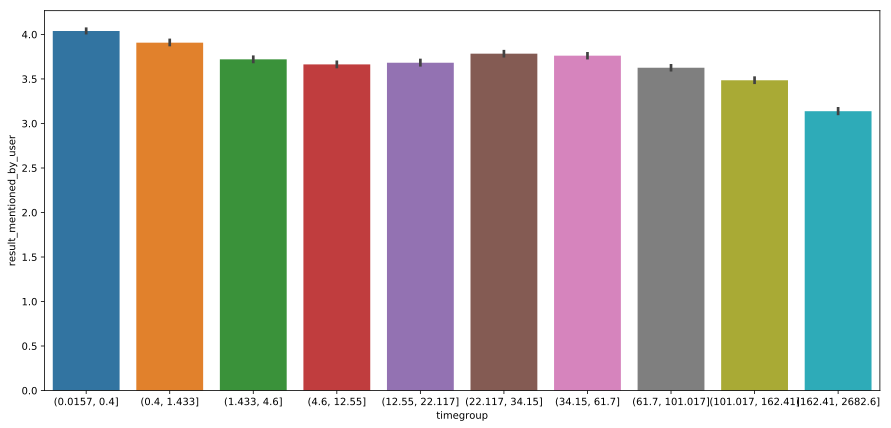

In [102]:
sns.barplot(x='timegroup', y='result_mentioned_by_user', data=support_tickets_w_ev)

In [29]:
# Кажется, время ответа особо не влияет на оценку
# Проверить, как влияет на количество объявлений после

In [162]:
num_of_items_after = support_tickets[['user_id', 'request_id', 'activity_start_dt', 'fact_reaction_dt']]
num_of_items_after.head()

,user_id,request_id,activity_start_dt,fact_reaction_dt
0,370 518 212,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00
1,2 138 799,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00
2,2 033 101,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00
3,177 122 000 003,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00
4,37 340 500 064,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00


In [127]:
new_items['item_starttime'] = pd.to_datetime(new_items['item_starttime'])

In [163]:
%%time
num_after = []
for row in num_of_items_after.itertuples():
    num_after.append(new_items.loc[(new_items['user_id'] == row.user_id) & 
              (new_items['item_starttime'] > pd.to_datetime(row.fact_reaction_dt))].count()[0])

KeyboardInterrupt: 

In [ ]:
# надо удалить из new_items тех, кого нет в в другой таблице

In [184]:
new_items.groupby('user_id')['item_id'].count()

user_id
100 000 095         109
100 000 209          15
100 000 217          15
100 000 232         144
100 000 242         205
100 000 275          33
100 000 433          15
100 000 438          25
100 000 540          32
100 000 563          36
100 000 812          19
100 000 834          26
100 001 250 015      42
100 003 000 014    1018
100 004 250 034      51
100 005 500 042     218
100 005 750 017       8
100 006 000 023      37
100 007 750 036      78
100 007 750 060       2
100 008 000 035       9
100 011 500 038      25
100 014 750 057       3
100 014 750 066      17
100 016 000 012       8
100 016 250 010      69
100 018 250 066      16
100 018 500 043      15
100 021 750 066      17
100 022 250 025     415
                   ... 
9 984 750 051        12
9 985 250 032        15
9 985 250 226        46
9 987 000 018         7
9 987 000 106        41
9 988 500 118        23
9 989 250 068        12
9 989 250 124        11
9 990                31
9 990 750 101         2
9 990 75